# Predicting Congestive Heart Failure:
Full caveat: this is for fun and coding practice. It is unlikely that reducing features into Principal Components will create better model prediction as PCA will purely base it's fit around variance in the data. As we have already reduced multicolinearity in the first logistic regression runs with regularization, this is a bit of a shot in the dark. But let's give it a try!

## Principal Component Analysis & Logistic Regression

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

In [2]:
pca = PCA()

### Import Data.

In [4]:
chf = pd.read_csv('CHF_Adults_Imputed_2019-09-16.csv').drop(labels = ['Unnamed: 0', 'EXPIRE_FLAG', 'SUBJECT_ID'], axis = 1)

In [5]:
chf.shape

(38550, 114)

In [7]:
chf.CHF.value_counts()

0.0    28722
1.0     9828
Name: CHF, dtype: int64

### Dummify & Scale Data to Prep for PCA

In [12]:
from sklearn import preprocessing

In [13]:
y = chf.CHF

In [14]:
x = chf.drop(labels = 'CHF', axis = 1)

Dummification of Categorical Features.

In [16]:
#GENDER
x = pd.concat([x,pd.get_dummies(x['GENDER'],prefix='GENDER', drop_first=False)], axis=1) #join dummies with old df
x.drop('GENDER', axis=1, inplace=True)
#INSURANCE
x = pd.concat([x,pd.get_dummies(x['INSURANCE'],prefix='INSURANCE', drop_first=False)], axis=1) #join dummies with old df
x.drop('INSURANCE', axis=1, inplace=True)
#LANGUAGE
x = pd.concat([x,pd.get_dummies(x['LANGUAGE'],prefix='LANGUAGE', drop_first=False)], axis=1) #join dummies with old df
x.drop('LANGUAGE', axis=1, inplace=True)
#RELIGION
x = pd.concat([x,pd.get_dummies(x['RELIGION'],prefix='RELIGION', drop_first=False)], axis=1) #join dummies with old df
x.drop('RELIGION', axis=1, inplace=True)
#MARITAL STATUS
x = pd.concat([x,pd.get_dummies(x['MARITAL_STATUS'],prefix='MARITAL_STATUS', drop_first=False)], axis=1) #join dummies with old df
x.drop('MARITAL_STATUS', axis=1, inplace=True)
#ETHNICITY
x = pd.concat([x,pd.get_dummies(x['ETHNICITY'],prefix='ETHNICITY', drop_first=False)], axis=1) #join dummies with old df
x.drop('ETHNICITY', axis=1, inplace=True)

Scaling

In [17]:
x_scaled = x / np.std(x, 0)

## Principal Component Analysis

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, chf['CHF'], test_size = 0.2)

In [26]:
X_train.shape

(30840, 167)

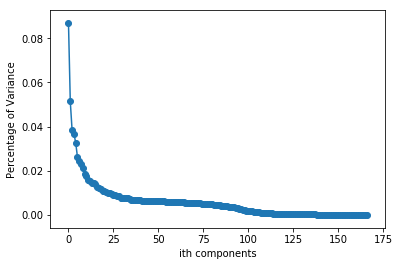

In [30]:
pca.set_params(n_components=None)
pca.fit(X_train)
plt.plot(range(167), pca.explained_variance_ratio_)
plt.scatter(range(167), pca.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

Test fit pca on 2 components for visualization

In [31]:
pca.set_params(n_components=2).fit(X_train)
X_train2 = pca.transform(X_train)

In [32]:
pca.explained_variance_ratio_

array([0.08683359, 0.05138415])

In [33]:
np.sum(pca.explained_variance_ratio_)

0.13821773951882158

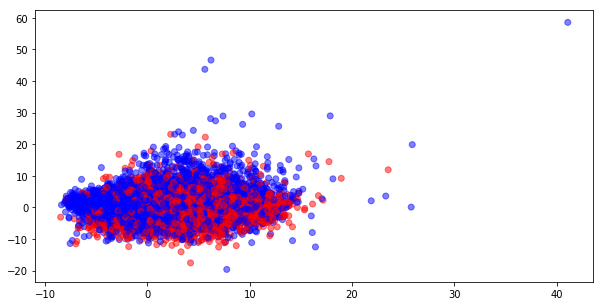

In [45]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=['red' if i == 1 else 'blue' for i in y_train ], alpha=0.5)
plt.show()

Now try all features.

In [49]:
pca.set_params(n_components=None)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
pca.explained_variance_ratio_

array([8.68335930e-02, 5.13841477e-02, 3.84517672e-02, 3.68616300e-02,
       3.28153048e-02, 2.61611663e-02, 2.45765763e-02, 2.29728149e-02,
       2.14244494e-02, 1.86186757e-02, 1.74998895e-02, 1.57649574e-02,
       1.53724842e-02, 1.46999620e-02, 1.43983498e-02, 1.41147863e-02,
       1.28688377e-02, 1.24011627e-02, 1.17542293e-02, 1.08013765e-02,
       1.07370856e-02, 1.03069804e-02, 1.01696597e-02, 9.77444148e-03,
       9.33553605e-03, 9.23610061e-03, 8.93594642e-03, 8.57474395e-03,
       8.38419294e-03, 7.90727485e-03, 7.84475967e-03, 7.55928914e-03,
       7.52589435e-03, 7.47889461e-03, 7.35387192e-03, 7.01331545e-03,
       6.78890806e-03, 6.74407445e-03, 6.72433429e-03, 6.66393539e-03,
       6.60252326e-03, 6.55548538e-03, 6.50155868e-03, 6.44569577e-03,
       6.38683839e-03, 6.37351636e-03, 6.35868157e-03, 6.28816599e-03,
       6.27748888e-03, 6.24293630e-03, 6.22307411e-03, 6.15566687e-03,
       6.15194821e-03, 6.12022789e-03, 6.10327080e-03, 6.08093860e-03,
      

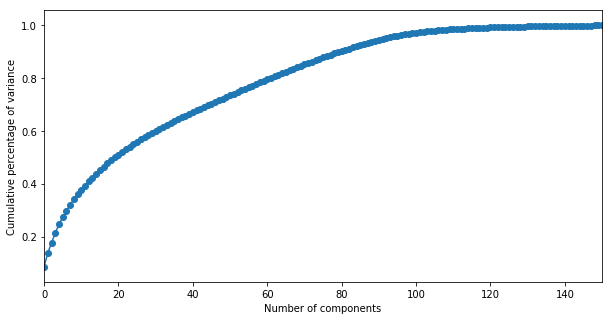

In [65]:
plt.scatter(range(167), np.cumsum(pca.explained_variance_ratio_))
plt.plot(range(167), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative percentage of variance')
plt.xlim(0, 150)
plt.show()

In [67]:
pca.set_params(n_components=20)
pca.fit(X_train)
X_train_scale20 = pca.transform(X_train)
logit.fit(X_train_scale20, y_train)
print("The training error is: %.4f" %(1 - logit.score(X_train_scale20, y_train)))

The training error is: 0.2112


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
X_test_scale = pca.transform(X_test / np.std(X_train, 0))
print("The test error is: %.4f" %(1-logit.score(X_test_scale[:, :20], y_test)))

The test error is: 0.2154


In [69]:
pca.set_params(n_components=80)
pca.fit(X_train)
X_train_scale80 = pca.transform(X_train)
logit.fit(X_train_scale80, y_train)
print("The training error is: %.4f" %(1 - logit.score(X_train_scale80, y_train)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The training error is: 0.2058


In [70]:
X_test_scale = pca.transform(X_test / np.std(X_train, 0))
print("The test error is: %.4f" %(1-logit.score(X_test_scale[:, :80], y_test)))

The test error is: 0.2152


### Results:
As expected, this accuracy is no better in accuracy than even our baseline logistic model. We'll end here, but this was fun =).